In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import sys

sys.path.insert(0, "/Users/flynnwang/repo/flynn/eco_bang_bang/agents/rl_b8_70M_0213/")

In [3]:
sys.path.insert(0, "/Users/flynnwang/repo/flynn/eco_bang_bang/agents")

In [5]:
import torch

from ecobangbang.env.luxenv import get_ob_sapce, LuxS3Env
from ecobangbang.model import _create_model, RewardSpec

reward_spec = RewardSpec(
        reward_min=-5,
        reward_max=+5,
        zero_sum=False,
    )

reward_shaping_params = dict(  new_observed_down_tri=0.0001,
  match_observed=0,
  match_win=1,
  use_hidden_relic_estimator=True,
  energy_cost_change=0.001,                             
)

obs_space_kwargs = {
    'use_energy_cost_map': True,
    'use_single_player': False,
}
env = LuxS3Env(reward_schema='match_explore_win_loss',
               reward_shaping_params=reward_shaping_params,
              obs_space_kwargs=obs_space_kwargs)

obs, reward, done, info = env.reset()

In [11]:
# from ecobangbang.agent import Agent

from rule_v3_4a0760b.ecobangbang.agent import Agent as Agent2
from rl_b8_70M_0213.ecobangbang.agent import Agent as RlAgent

# Feature Plots

In [12]:
def plot_imgs(images):
    grid_size = 3
    fig, axes = plt.subplots(grid_size + 1, grid_size, figsize=(10, 10))
    
    for i, ax in enumerate(axes.flat):
        if i < len(images):
            name, img = images[i]
            img = img.T
            ax.imshow(img, cmap='viridis')  # Display image (grayscale here)
            ax.set_title(name, fontsize=8)
            ax.axis('off')  # Turn off the axes
            ax.set_xticks(np.arange(-0.5, img.shape[1], 1))  # Position gridlines at the edges of the pixels
            ax.set_yticks(np.arange(-0.5, img.shape[0], 1))  # Position gridlines at the edges of the pixels
            # Set gridlines to be visible
            ax.grid(which='both', color='black', linestyle='-', linewidth=.5)
        else:
            ax.axis('off')  # Turn off the axes for empty slots
    
    plt.tight_layout()
    plt.show()

In [13]:
import ecobangbang

ecobangbang

<module 'ecobangbang' from '/Users/flynnwang/repo/flynn/eco_bang_bang/agents/rl_b8_70M_0213/ecobangbang/__init__.py'>

In [16]:
from ecobangbang.env.luxenv import LuxS3Env
from ecobangbang.env.const import *


env = LuxS3Env(reward_schema='match_explore_win_loss',
               reward_shaping_params=reward_shaping_params,
              obs_space_kwargs=obs_space_kwargs)
obs, reward, done, info = env.reset(seed=96290790)

def act(a, ob):
    player_id = a.player
    step = ob['steps']
    actions = a.act(step, ob)
    return actions

env_cfg = env.mms[0].env_cfg
a0 = RlAgent('player_0', env_cfg)
a1 = Agent2('player_1', env_cfg)

Model loaded


In [17]:
for i in range(53):
    action0 = env.agent_action_do_model_action(act(a0, env.mms[0].past_obs[0]), env.mms[0])
    action1 = env.agent_action_do_model_action(act(a1, env.mms[1].past_obs[0]), env.mms[1])
    player_actions = [{UNITS_ACTION: action0}, {UNITS_ACTION: action1}]
    obs, reward, done, info = env.step(player_actions)

step=1 final_state.energy_nodes=[[10 19]
 [10 21]
 [12 22]
 [ 4 13]
 [ 2 13]
 [ 1 11]], final_state.energy_nodes_mask=[ True  True False  True  True False]


***** --> found energy node at [ 2 13]
step=0 (after update), energy field found=True, node=[ 2 13], candidates=[array([ 2, 13])]
--> using energy node at [ 2 13]
***** --> found energy node at [ 2 13]
step=0 (after update), energy field found=True, node=[ 2 13], candidates=[array([ 2, 13])]
--> using energy node at [ 2 13]
***** --> found energy node at [ 2 13]
step=0 (after update), energy field found=True, node=[ 2 13], candidates=[array([ 2, 13])]
--> using energy node at [ 2 13]
***** --> found energy node at [ 4 13]


step=2 final_state.energy_nodes=[[10 19]
 [10 21]
 [12 22]
 [ 4 13]
 [ 2 13]
 [ 1 11]], final_state.energy_nodes_mask=[ True  True False  True  True False]


----------small reset energy node positions, found? = True
energy field changed at step = 1
step=1 (after update), energy field found=True, node=[ 4 13], candidates=[array([ 4, 13])]
--> using energy node at [ 4 13]
***** --> found energy node at [ 4 13]
----------small reset energy node positions, found? = True
energy field changed at step = 1
step=1 (after update), energy field found=True, node=[ 4 13], candidates=[array([ 4, 13])]
--> using energy node at [ 4 13]
***** --> found energy node at [ 4 13]
----------small reset energy node positions, found? = True
energy field changed at step = 1
step=1 (after update), energy field found=True, node=[ 4 13], candidates=[array([ 4, 13])]
--> using energy node at [ 4 13]
step=2 (after update), energy field found=True, node=[ 4 13], candidates=[array([ 4, 13])]
--> using energy node at [ 4 13]
step=2 (after update), energy field found=True, node=[ 4 13], candidates=[array([ 4, 13])]
--> using energy node at [ 4 13]
step=2 (after update), ene

step=3 final_state.energy_nodes=[[10 19]
 [10 21]
 [12 22]
 [ 4 13]
 [ 2 13]
 [ 1 11]], final_state.energy_nodes_mask=[ True  True False  True  True False]
step=4 final_state.energy_nodes=[[10 19]
 [10 21]
 [12 22]
 [ 4 13]
 [ 2 13]
 [ 1 11]], final_state.energy_nodes_mask=[ True  True False  True  True False]
step=5 final_state.energy_nodes=[[10 19]
 [10 21]
 [12 22]
 [ 4 13]
 [ 2 13]
 [ 1 11]], final_state.energy_nodes_mask=[ True  True False  True  True False]
step=6 final_state.energy_nodes=[[10 19]
 [10 21]
 [12 22]
 [ 4 13]
 [ 2 13]
 [ 1 11]], final_state.energy_nodes_mask=[ True  True False  True  True False]
step=7 final_state.energy_nodes=[[10 19]
 [10 21]
 [12 22]
 [ 4 13]
 [ 2 13]
 [ 1 11]], final_state.energy_nodes_mask=[ True  True False  True  True False]
step=8 final_state.energy_nodes=[[10 19]
 [10 21]
 [12 22]
 [ 4 13]
 [ 2 13]
 [ 1 11]], final_state.energy_nodes_mask=[ True  True False  True  True False]


step=5 (after update), energy field found=True, node=[ 4 13], candidates=[array([ 4, 13])]
--> using energy node at [ 4 13]
step=5 (after update), energy field found=True, node=[ 4 13], candidates=[array([ 4, 13])]
--> using energy node at [ 4 13]
step=5 (after update), energy field found=True, node=[ 4 13], candidates=[array([ 4, 13])]
--> using energy node at [ 4 13]
step=6 (after update), energy field found=True, node=[ 4 13], candidates=[array([ 4, 13])]
--> using energy node at [ 4 13]
step=6 (after update), energy field found=True, node=[ 4 13], candidates=[array([ 4, 13])]
--> using energy node at [ 4 13]
step=6 (after update), energy field found=True, node=[ 4 13], candidates=[array([ 4, 13])]
--> using energy node at [ 4 13]
step=8, apply nebula drift = -0.15, Counter({-0.15: 2, 0.15: 0, -0.1: -99, -0.05: -99, -0.025: -99, 0.025: -99, 0.05: -99, 0.1: -99})
step=7 (after update), energy field found=True, node=[ 4 13], candidates=[array([ 4, 13])]
--> using energy node at [ 4 13

step=9 final_state.energy_nodes=[[10 19]
 [10 21]
 [12 22]
 [ 4 13]
 [ 2 13]
 [ 1 11]], final_state.energy_nodes_mask=[ True  True False  True  True False]
step=10 final_state.energy_nodes=[[10 19]
 [10 21]
 [12 22]
 [ 4 13]
 [ 2 13]
 [ 1 11]], final_state.energy_nodes_mask=[ True  True False  True  True False]
step=11 final_state.energy_nodes=[[10 19]
 [10 21]
 [12 22]
 [ 4 13]
 [ 2 13]
 [ 1 11]], final_state.energy_nodes_mask=[ True  True False  True  True False]
step=12 final_state.energy_nodes=[[10 19]
 [10 21]
 [12 22]
 [ 4 13]
 [ 2 13]
 [ 1 11]], final_state.energy_nodes_mask=[ True  True False  True  True False]


step=10 (after update), energy field found=True, node=[ 4 13], candidates=[array([ 4, 13])]
--> using energy node at [ 4 13]
step=10 (after update), energy field found=True, node=[ 4 13], candidates=[array([ 4, 13])]
--> using energy node at [ 4 13]
step=10 (after update), energy field found=True, node=[ 4 13], candidates=[array([ 4, 13])]
--> using energy node at [ 4 13]
step=11 (after update), energy field found=True, node=[ 4 13], candidates=[array([ 4, 13])]
--> using energy node at [ 4 13]
step=11 (after update), energy field found=True, node=[ 4 13], candidates=[array([ 4, 13])]
--> using energy node at [ 4 13]
step=11 (after update), energy field found=True, node=[ 4 13], candidates=[array([ 4, 13])]
--> using energy node at [ 4 13]
step=12 (after update), energy field found=True, node=[ 4 13], candidates=[array([ 4, 13])]
--> using energy node at [ 4 13]
step=12 (after update), energy field found=True, node=[ 4 13], candidates=[array([ 4, 13])]
--> using energy node at [ 4 13]


step=13 final_state.energy_nodes=[[10 19]
 [10 21]
 [12 22]
 [ 4 13]
 [ 2 13]
 [ 1 11]], final_state.energy_nodes_mask=[ True  True False  True  True False]
step=14 final_state.energy_nodes=[[10 19]
 [10 21]
 [12 22]
 [ 4 13]
 [ 2 13]
 [ 1 11]], final_state.energy_nodes_mask=[ True  True False  True  True False]
step=15 final_state.energy_nodes=[[10 19]
 [10 21]
 [12 22]
 [ 4 13]
 [ 2 13]
 [ 1 11]], final_state.energy_nodes_mask=[ True  True False  True  True False]
step=16 final_state.energy_nodes=[[10 19]
 [10 21]
 [12 22]
 [ 4 13]
 [ 2 13]
 [ 1 11]], final_state.energy_nodes_mask=[ True  True False  True  True False]


step=15, apply nebula drift = -0.15, Counter({-0.15: 3, 0.15: -1, -0.1: -199, -0.05: -199, -0.025: -199, 0.025: -199, 0.05: -199, 0.1: -199})
step=14 (after update), energy field found=True, node=[ 4 13], candidates=[array([ 4, 13])]
--> using energy node at [ 4 13]
step=15, apply nebula drift = -0.15, Counter({-0.15: 3, 0.15: -1, -0.1: -199, -0.05: -199, -0.025: -199, 0.025: -199, 0.05: -199, 0.1: -199})
step=14 (after update), energy field found=True, node=[ 4 13], candidates=[array([ 4, 13])]
--> using energy node at [ 4 13]
step=15, apply nebula drift = -0.15, Counter({-0.15: 3, 0.15: -1, -0.1: -199, -0.05: -199, -0.025: -199, 0.025: -199, 0.05: -199, 0.1: -199})
step=14 (after update), energy field found=True, node=[ 4 13], candidates=[array([ 4, 13])]
--> using energy node at [ 4 13]
step=15 (after update), energy field found=True, node=[ 4 13], candidates=[array([ 4, 13])]
--> using energy node at [ 4 13]
step=15 (after update), energy field found=True, node=[ 4 13], candidates=

step=17 final_state.energy_nodes=[[10 19]
 [10 21]
 [12 22]
 [ 4 13]
 [ 2 13]
 [ 1 11]], final_state.energy_nodes_mask=[ True  True False  True  True False]
step=18 final_state.energy_nodes=[[10 19]
 [10 21]
 [12 22]
 [ 4 13]
 [ 2 13]
 [ 1 11]], final_state.energy_nodes_mask=[ True  True False  True  True False]
step=19 final_state.energy_nodes=[[10 19]
 [10 21]
 [12 22]
 [ 4 13]
 [ 2 13]
 [ 1 11]], final_state.energy_nodes_mask=[ True  True False  True  True False]


step=17 (after update), energy field found=True, node=[ 4 13], candidates=[array([ 4, 13])]
--> using energy node at [ 4 13]
step=17 (after update), energy field found=True, node=[ 4 13], candidates=[array([ 4, 13])]
--> using energy node at [ 4 13]
step=17 (after update), energy field found=True, node=[ 4 13], candidates=[array([ 4, 13])]
--> using energy node at [ 4 13]
step=18 (after update), energy field found=True, node=[ 4 13], candidates=[array([ 4, 13])]
--> using energy node at [ 4 13]
step=18 (after update), energy field found=True, node=[ 4 13], candidates=[array([ 4, 13])]
--> using energy node at [ 4 13]
step=18 (after update), energy field found=True, node=[ 4 13], candidates=[array([ 4, 13])]
--> using energy node at [ 4 13]
step=19 (after update), energy field found=True, node=[ 4 13], candidates=[array([ 4, 13])]
--> using energy node at [ 4 13]
step=19 (after update), energy field found=True, node=[ 4 13], candidates=[array([ 4, 13])]
--> using energy node at [ 4 13]


step=20 final_state.energy_nodes=[[10 19]
 [10 21]
 [12 22]
 [ 4 13]
 [ 2 13]
 [ 1 11]], final_state.energy_nodes_mask=[ True  True False  True  True False]
step=21 final_state.energy_nodes=[[10 19]
 [10 21]
 [12 22]
 [ 4 13]
 [ 2 13]
 [ 1 11]], final_state.energy_nodes_mask=[ True  True False  True  True False]


step=21, apply nebula drift = -0.15, Counter({-0.15: 4, 0.15: -2, -0.1: -198, -0.05: -198, 0.05: -200, 0.1: -200, -0.025: -299, 0.025: -299})
step=20 (after update), energy field found=True, node=[ 4 13], candidates=[array([ 4, 13])]
--> using energy node at [ 4 13]
step=21, apply nebula drift = -0.15, Counter({-0.15: 4, 0.15: -2, -0.1: -198, -0.05: -198, 0.05: -200, 0.1: -200, -0.025: -299, 0.025: -299})
step=20 (after update), energy field found=True, node=[ 4 13], candidates=[array([ 4, 13])]
--> using energy node at [ 4 13]
step=21, apply nebula drift = -0.15, Counter({-0.15: 4, 0.15: -2, -0.1: -198, -0.05: -198, 0.05: -200, 0.1: -200, -0.025: -299, 0.025: -299})
step=20 (after update), energy field found=True, node=[ 4 13], candidates=[array([ 4, 13])]
--> using energy node at [ 4 13]
step=21 (after update), energy field found=True, node=[ 4 13], candidates=[array([ 4, 13])]
--> using energy node at [ 4 13]
step=21 (after update), energy field found=True, node=[ 4 13], candidates=

step=22 final_state.energy_nodes=[[10 19]
 [10 21]
 [12 22]
 [ 4 13]
 [ 2 13]
 [ 1 11]], final_state.energy_nodes_mask=[ True  True False  True  True False]
step=23 final_state.energy_nodes=[[10 19]
 [10 21]
 [12 22]
 [ 4 13]
 [ 2 13]
 [ 1 11]], final_state.energy_nodes_mask=[ True  True False  True  True False]
step=24 final_state.energy_nodes=[[10 19]
 [10 21]
 [12 22]
 [ 4 13]
 [ 2 13]
 [ 1 11]], final_state.energy_nodes_mask=[ True  True False  True  True False]


step=22 (after update), energy field found=True, node=[ 4 13], candidates=[array([ 4, 13])]
--> using energy node at [ 4 13]
step=22 (after update), energy field found=True, node=[ 4 13], candidates=[array([ 4, 13])]
--> using energy node at [ 4 13]
step=23 (after update), energy field found=True, node=[ 4 13], candidates=[array([ 4, 13])]
--> using energy node at [ 4 13]
step=23 (after update), energy field found=True, node=[ 4 13], candidates=[array([ 4, 13])]
--> using energy node at [ 4 13]
step=23 (after update), energy field found=True, node=[ 4 13], candidates=[array([ 4, 13])]
--> using energy node at [ 4 13]
step=24 (after update), energy field found=True, node=[ 4 13], candidates=[array([ 4, 13])]
--> using energy node at [ 4 13]
step=24 (after update), energy field found=True, node=[ 4 13], candidates=[array([ 4, 13])]
--> using energy node at [ 4 13]
step=24 (after update), energy field found=True, node=[ 4 13], candidates=[array([ 4, 13])]
--> using energy node at [ 4 13]


step=25 final_state.energy_nodes=[[10 19]
 [10 21]
 [12 22]
 [ 4 13]
 [ 2 13]
 [ 1 11]], final_state.energy_nodes_mask=[ True  True False  True  True False]
step=26 final_state.energy_nodes=[[10 19]
 [10 21]
 [12 22]
 [ 4 13]
 [ 2 13]
 [ 1 11]], final_state.energy_nodes_mask=[ True  True False  True  True False]
step=27 final_state.energy_nodes=[[10 19]
 [10 21]
 [12 22]
 [ 4 13]
 [ 2 13]
 [ 1 11]], final_state.energy_nodes_mask=[ True  True False  True  True False]


step=25 (after update), energy field found=True, node=[ 4 13], candidates=[array([ 4, 13])]
--> using energy node at [ 4 13]
step=25 (after update), energy field found=True, node=[ 4 13], candidates=[array([ 4, 13])]
--> using energy node at [ 4 13]
step=25 (after update), energy field found=True, node=[ 4 13], candidates=[array([ 4, 13])]
--> using energy node at [ 4 13]
step=26 (after update), energy field found=True, node=[ 4 13], candidates=[array([ 4, 13])]
--> using energy node at [ 4 13]
step=26 (after update), energy field found=True, node=[ 4 13], candidates=[array([ 4, 13])]
--> using energy node at [ 4 13]
step=26 (after update), energy field found=True, node=[ 4 13], candidates=[array([ 4, 13])]
--> using energy node at [ 4 13]
step=28, apply nebula drift = -0.15, Counter({-0.15: 5, 0.15: -3, -0.1: -298, -0.05: -298, 0.05: -300, 0.1: -300, -0.025: -399, 0.025: -399})
step=27 (after update), energy field found=True, node=[ 4 13], candidates=[array([ 4, 13])]
--> using energy

step=28 final_state.energy_nodes=[[10 19]
 [10 21]
 [12 22]
 [ 4 13]
 [ 2 13]
 [ 1 11]], final_state.energy_nodes_mask=[ True  True False  True  True False]
step=29 final_state.energy_nodes=[[10 19]
 [10 21]
 [12 22]
 [ 4 13]
 [ 2 13]
 [ 1 11]], final_state.energy_nodes_mask=[ True  True False  True  True False]


step=28 (after update), energy field found=True, node=[ 4 13], candidates=[array([ 4, 13])]
--> using energy node at [ 4 13]
step=28 (after update), energy field found=True, node=[ 4 13], candidates=[array([ 4, 13])]
--> using energy node at [ 4 13]
step=28 (after update), energy field found=True, node=[ 4 13], candidates=[array([ 4, 13])]
--> using energy node at [ 4 13]
step=29 (after update), energy field found=True, node=[ 4 13], candidates=[array([ 4, 13])]
--> using energy node at [ 4 13]
step=29 (after update), energy field found=True, node=[ 4 13], candidates=[array([ 4, 13])]
--> using energy node at [ 4 13]
step=29 (after update), energy field found=True, node=[ 4 13], candidates=[array([ 4, 13])]
--> using energy node at [ 4 13]


step=30 final_state.energy_nodes=[[10 19]
 [10 21]
 [12 22]
 [ 4 13]
 [ 2 13]
 [ 1 11]], final_state.energy_nodes_mask=[ True  True False  True  True False]
step=31 final_state.energy_nodes=[[10 19]
 [10 21]
 [12 22]
 [ 4 13]
 [ 2 13]
 [ 1 11]], final_state.energy_nodes_mask=[ True  True False  True  True False]


step=30 (after update), energy field found=True, node=[ 4 13], candidates=[array([ 4, 13])]
--> using energy node at [ 4 13]
step=30 (after update), energy field found=True, node=[ 4 13], candidates=[array([ 4, 13])]
--> using energy node at [ 4 13]
step=30 (after update), energy field found=True, node=[ 4 13], candidates=[array([ 4, 13])]
--> using energy node at [ 4 13]
step=31 (after update), energy field found=True, node=[ 4 13], candidates=[array([ 4, 13])]
--> using energy node at [ 4 13]
step=31 (after update), energy field found=True, node=[ 4 13], candidates=[array([ 4, 13])]
--> using energy node at [ 4 13]
step=31 (after update), energy field found=True, node=[ 4 13], candidates=[array([ 4, 13])]
--> using energy node at [ 4 13]


step=32 final_state.energy_nodes=[[10 19]
 [10 21]
 [12 22]
 [ 4 13]
 [ 2 13]
 [ 1 11]], final_state.energy_nodes_mask=[ True  True False  True  True False]
step=33 final_state.energy_nodes=[[10 19]
 [10 21]
 [12 22]
 [ 4 13]
 [ 2 13]
 [ 1 11]], final_state.energy_nodes_mask=[ True  True False  True  True False]


step=32 (after update), energy field found=True, node=[ 4 13], candidates=[array([ 4, 13])]
--> using energy node at [ 4 13]
step=32 (after update), energy field found=True, node=[ 4 13], candidates=[array([ 4, 13])]
--> using energy node at [ 4 13]
step=32 (after update), energy field found=True, node=[ 4 13], candidates=[array([ 4, 13])]
--> using energy node at [ 4 13]
step=33 (after update), energy field found=True, node=[ 4 13], candidates=[array([ 4, 13])]
--> using energy node at [ 4 13]
step=33 (after update), energy field found=True, node=[ 4 13], candidates=[array([ 4, 13])]
--> using energy node at [ 4 13]
step=33 (after update), energy field found=True, node=[ 4 13], candidates=[array([ 4, 13])]
--> using energy node at [ 4 13]


step=34 final_state.energy_nodes=[[10 19]
 [10 21]
 [12 22]
 [ 4 13]
 [ 2 13]
 [ 1 11]], final_state.energy_nodes_mask=[ True  True False  True  True False]
step=35 final_state.energy_nodes=[[10 19]
 [10 21]
 [12 22]
 [ 4 13]
 [ 2 13]
 [ 1 11]], final_state.energy_nodes_mask=[ True  True False  True  True False]


step=35, apply nebula drift = -0.15, Counter({-0.15: 6, 0.15: -4, -0.1: -398, -0.05: -398, 0.05: -400, 0.1: -400, -0.025: -499, 0.025: -499})
step=34 (after update), energy field found=True, node=[ 4 13], candidates=[array([ 4, 13])]
--> using energy node at [ 4 13]
step=35, apply nebula drift = -0.15, Counter({-0.15: 6, 0.15: -4, -0.1: -398, -0.05: -398, 0.05: -400, 0.1: -400, -0.025: -499, 0.025: -499})
step=34 (after update), energy field found=True, node=[ 4 13], candidates=[array([ 4, 13])]
--> using energy node at [ 4 13]
step=35, apply nebula drift = -0.15, Counter({-0.15: 6, 0.15: -4, -0.1: -398, -0.05: -398, 0.05: -400, 0.1: -400, -0.025: -499, 0.025: -499})
step=34 (after update), energy field found=True, node=[ 4 13], candidates=[array([ 4, 13])]
--> using energy node at [ 4 13]
step=35 (after update), energy field found=True, node=[ 4 13], candidates=[array([ 4, 13])]
--> using energy node at [ 4 13]
step=35 (after update), energy field found=True, node=[ 4 13], candidates=

step=36 final_state.energy_nodes=[[10 19]
 [10 21]
 [12 22]
 [ 4 13]
 [ 2 13]
 [ 1 11]], final_state.energy_nodes_mask=[ True  True False  True  True False]
step=37 final_state.energy_nodes=[[10 19]
 [10 21]
 [12 22]
 [ 4 13]
 [ 2 13]
 [ 1 11]], final_state.energy_nodes_mask=[ True  True False  True  True False]


step=36 (after update), energy field found=True, node=[ 4 13], candidates=[array([ 4, 13])]
--> using energy node at [ 4 13]
step=36 (after update), energy field found=True, node=[ 4 13], candidates=[array([ 4, 13])]
--> using energy node at [ 4 13]
step=36 (after update), energy field found=True, node=[ 4 13], candidates=[array([ 4, 13])]
--> using energy node at [ 4 13]
step=37 (after update), energy field found=True, node=[ 4 13], candidates=[array([ 4, 13])]
--> using energy node at [ 4 13]
step=37 (after update), energy field found=True, node=[ 4 13], candidates=[array([ 4, 13])]
--> using energy node at [ 4 13]
step=37 (after update), energy field found=True, node=[ 4 13], candidates=[array([ 4, 13])]
--> using energy node at [ 4 13]


step=38 final_state.energy_nodes=[[10 19]
 [10 21]
 [12 22]
 [ 4 13]
 [ 2 13]
 [ 1 11]], final_state.energy_nodes_mask=[ True  True False  True  True False]
step=39 final_state.energy_nodes=[[10 19]
 [10 21]
 [12 22]
 [ 4 13]
 [ 2 13]
 [ 1 11]], final_state.energy_nodes_mask=[ True  True False  True  True False]


step=38 (after update), energy field found=True, node=[ 4 13], candidates=[array([ 4, 13])]
--> using energy node at [ 4 13]
step=38 (after update), energy field found=True, node=[ 4 13], candidates=[array([ 4, 13])]
--> using energy node at [ 4 13]
step=38 (after update), energy field found=True, node=[ 4 13], candidates=[array([ 4, 13])]
--> using energy node at [ 4 13]
step=39 (after update), energy field found=True, node=[ 4 13], candidates=[array([ 4, 13])]
--> using energy node at [ 4 13]
step=39 (after update), energy field found=True, node=[ 4 13], candidates=[array([ 4, 13])]
--> using energy node at [ 4 13]
step=39 (after update), energy field found=True, node=[ 4 13], candidates=[array([ 4, 13])]
--> using energy node at [ 4 13]


step=40 final_state.energy_nodes=[[10 19]
 [10 21]
 [12 22]
 [ 4 13]
 [ 2 13]
 [ 1 11]], final_state.energy_nodes_mask=[ True  True False  True  True False]
step=41 final_state.energy_nodes=[[10 19]
 [10 21]
 [12 22]
 [ 4 13]
 [ 2 13]
 [ 1 11]], final_state.energy_nodes_mask=[ True  True False  True  True False]
step=42 final_state.energy_nodes=[[10 19]
 [10 21]
 [12 22]
 [ 4 13]
 [ 2 13]
 [ 1 11]], final_state.energy_nodes_mask=[ True  True False  True  True False]


step=41, apply nebula drift = -0.15, Counter({-0.15: 7, 0.15: -5, -0.1: -397, -0.05: -397, 0.05: -401, 0.1: -401, -0.025: -498, 0.025: -500})
step=40 (after update), energy field found=True, node=[ 4 13], candidates=[array([ 4, 13])]
--> using energy node at [ 4 13]
step=41, apply nebula drift = -0.15, Counter({-0.15: 7, 0.15: -5, -0.1: -397, -0.05: -397, 0.05: -401, 0.1: -401, -0.025: -498, 0.025: -500})
step=40 (after update), energy field found=True, node=[ 4 13], candidates=[array([ 4, 13])]
--> using energy node at [ 4 13]
step=41, apply nebula drift = -0.15, Counter({-0.15: 7, 0.15: -5, -0.1: -397, -0.05: -397, 0.05: -401, 0.1: -401, -0.025: -498, 0.025: -500})
step=40 (after update), energy field found=True, node=[ 4 13], candidates=[array([ 4, 13])]
--> using energy node at [ 4 13]
step=41 (after update), energy field found=True, node=[ 4 13], candidates=[array([ 4, 13])]
--> using energy node at [ 4 13]
step=41 (after update), energy field found=True, node=[ 4 13], candidates=

step=43 final_state.energy_nodes=[[10 19]
 [10 21]
 [12 22]
 [ 4 13]
 [ 2 13]
 [ 1 11]], final_state.energy_nodes_mask=[ True  True False  True  True False]
step=44 final_state.energy_nodes=[[10 19]
 [10 21]
 [12 22]
 [ 4 13]
 [ 2 13]
 [ 1 11]], final_state.energy_nodes_mask=[ True  True False  True  True False]


step=42 (after update), energy field found=True, node=[ 4 13], candidates=[array([ 4, 13])]
--> using energy node at [ 4 13]
step=42 (after update), energy field found=True, node=[ 4 13], candidates=[array([ 4, 13])]
--> using energy node at [ 4 13]
step=42 (after update), energy field found=True, node=[ 4 13], candidates=[array([ 4, 13])]
--> using energy node at [ 4 13]
step=43 (after update), energy field found=True, node=[ 4 13], candidates=[array([ 4, 13])]
--> using energy node at [ 4 13]
step=43 (after update), energy field found=True, node=[ 4 13], candidates=[array([ 4, 13])]
--> using energy node at [ 4 13]
step=43 (after update), energy field found=True, node=[ 4 13], candidates=[array([ 4, 13])]
--> using energy node at [ 4 13]


step=45 final_state.energy_nodes=[[10 19]
 [10 21]
 [12 22]
 [ 4 13]
 [ 2 13]
 [ 1 11]], final_state.energy_nodes_mask=[ True  True False  True  True False]
step=46 final_state.energy_nodes=[[10 19]
 [10 21]
 [12 22]
 [ 4 13]
 [ 2 13]
 [ 1 11]], final_state.energy_nodes_mask=[ True  True False  True  True False]


step=44 (after update), energy field found=True, node=[ 4 13], candidates=[array([ 4, 13])]
--> using energy node at [ 4 13]
step=44 (after update), energy field found=True, node=[ 4 13], candidates=[array([ 4, 13])]
--> using energy node at [ 4 13]
step=44 (after update), energy field found=True, node=[ 4 13], candidates=[array([ 4, 13])]
--> using energy node at [ 4 13]
step=45 (after update), energy field found=True, node=[ 4 13], candidates=[array([ 4, 13])]
--> using energy node at [ 4 13]
step=45 (after update), energy field found=True, node=[ 4 13], candidates=[array([ 4, 13])]
--> using energy node at [ 4 13]
step=45 (after update), energy field found=True, node=[ 4 13], candidates=[array([ 4, 13])]
--> using energy node at [ 4 13]


step=47 final_state.energy_nodes=[[10 19]
 [10 21]
 [12 22]
 [ 4 13]
 [ 2 13]
 [ 1 11]], final_state.energy_nodes_mask=[ True  True False  True  True False]
step=48 final_state.energy_nodes=[[10 19]
 [10 21]
 [12 22]
 [ 4 13]
 [ 2 13]
 [ 1 11]], final_state.energy_nodes_mask=[ True  True False  True  True False]


step=46 (after update), energy field found=True, node=[ 4 13], candidates=[array([ 4, 13])]
--> using energy node at [ 4 13]
step=46 (after update), energy field found=True, node=[ 4 13], candidates=[array([ 4, 13])]
--> using energy node at [ 4 13]
step=46 (after update), energy field found=True, node=[ 4 13], candidates=[array([ 4, 13])]
--> using energy node at [ 4 13]
step=48, apply nebula drift = -0.15, Counter({-0.15: 8, 0.15: -6, -0.1: -497, -0.05: -497, 0.05: -501, 0.1: -501, -0.025: -598, 0.025: -600})
step=47 (after update), energy field found=True, node=[ 4 13], candidates=[array([ 4, 13])]
--> using energy node at [ 4 13]
step=48, apply nebula drift = -0.15, Counter({-0.15: 8, 0.15: -6, -0.1: -497, -0.05: -497, 0.05: -501, 0.1: -501, -0.025: -598, 0.025: -600})
step=47 (after update), energy field found=True, node=[ 4 13], candidates=[array([ 4, 13])]
--> using energy node at [ 4 13]
step=48, apply nebula drift = -0.15, Counter({-0.15: 8, 0.15: -6, -0.1: -497, -0.05: -497, 

step=49 final_state.energy_nodes=[[10 19]
 [10 21]
 [12 22]
 [ 4 13]
 [ 2 13]
 [ 1 11]], final_state.energy_nodes_mask=[ True  True False  True  True False]
step=50 final_state.energy_nodes=[[10 19]
 [10 21]
 [12 22]
 [ 4 13]
 [ 2 13]
 [ 1 11]], final_state.energy_nodes_mask=[ True  True False  True  True False]


step=48 (after update), energy field found=True, node=[ 4 13], candidates=[array([ 4, 13])]
--> using energy node at [ 4 13]
step=48 (after update), energy field found=True, node=[ 4 13], candidates=[array([ 4, 13])]
--> using energy node at [ 4 13]
step=48 (after update), energy field found=True, node=[ 4 13], candidates=[array([ 4, 13])]
--> using energy node at [ 4 13]
step=49 (after update), energy field found=True, node=[ 4 13], candidates=[array([ 4, 13])]
--> using energy node at [ 4 13]
step=49 (after update), energy field found=True, node=[ 4 13], candidates=[array([ 4, 13])]
--> using energy node at [ 4 13]
step=49 (after update), energy field found=True, node=[ 4 13], candidates=[array([ 4, 13])]
--> using energy node at [ 4 13]


step=51 final_state.energy_nodes=[[10 19]
 [10 21]
 [12 22]
 [ 4 13]
 [ 2 13]
 [ 1 11]], final_state.energy_nodes_mask=[ True  True False  True  True False]
step=52 final_state.energy_nodes=[[10 19]
 [10 21]
 [12 22]
 [ 4 13]
 [ 2 13]
 [ 1 11]], final_state.energy_nodes_mask=[ True  True False  True  True False]


step=50 (after update), energy field found=True, node=[ 4 13], candidates=[array([ 4, 13])]
--> using energy node at [ 4 13]
step=50 (after update), energy field found=True, node=[ 4 13], candidates=[array([ 4, 13])]
--> using energy node at [ 4 13]
step=50 (after update), energy field found=True, node=[ 4 13], candidates=[array([ 4, 13])]
--> using energy node at [ 4 13]
step=51 (after update), energy field found=True, node=[ 4 13], candidates=[array([ 4, 13])]
--> using energy node at [ 4 13]
step=51 (after update), energy field found=True, node=[ 4 13], candidates=[array([ 4, 13])]
--> using energy node at [ 4 13]
step=51 (after update), energy field found=True, node=[ 4 13], candidates=[array([ 4, 13])]
--> using energy node at [ 4 13]


step=53 final_state.energy_nodes=[[10 19]
 [10 21]
 [12 22]
 [ 4 13]
 [ 2 13]
 [ 1 11]], final_state.energy_nodes_mask=[ True  True False  True  True False]


step=52 (after update), energy field found=True, node=[ 4 13], candidates=[array([ 4, 13])]
--> using energy node at [ 4 13]
step=52 (after update), energy field found=True, node=[ 4 13], candidates=[array([ 4, 13])]
--> using energy node at [ 4 13]


53.0 53.0
number of units: 16


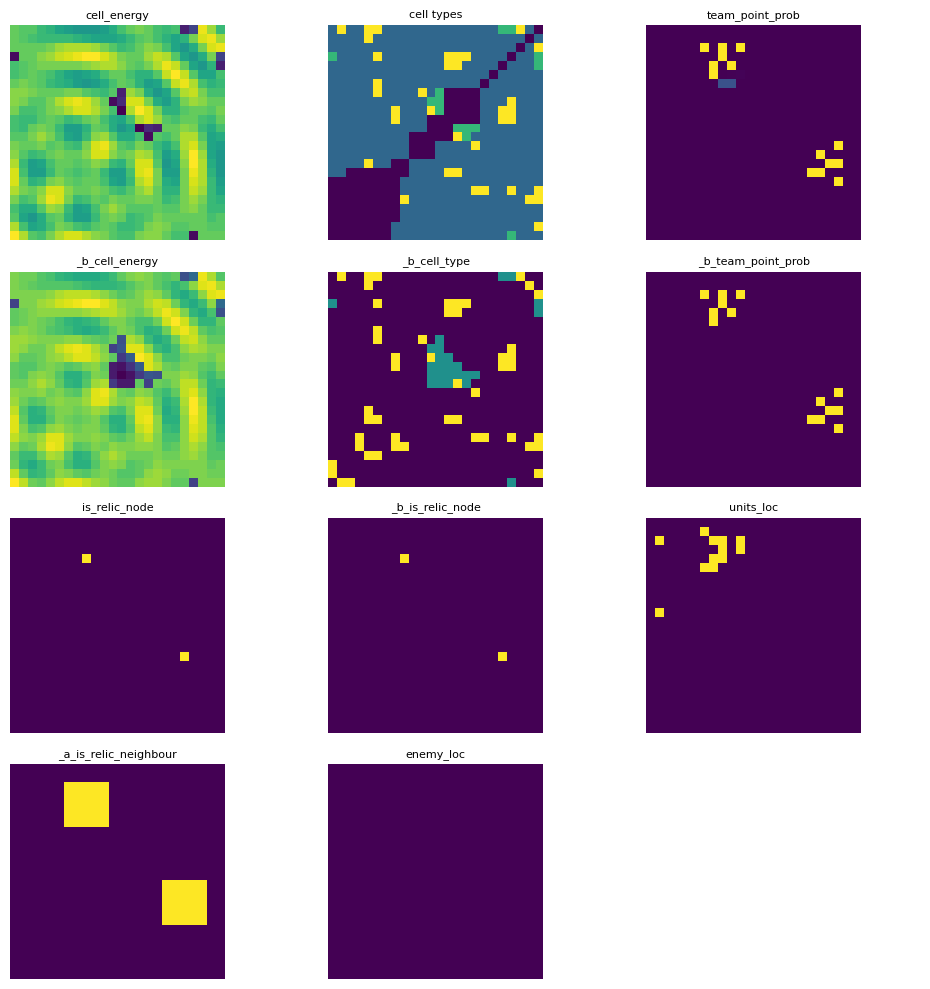

In [18]:
PLAYER_ID = 0
ob = obs[PLAYER_ID]
print(ob['game_step'][0][0][0] * 505, ob['match_step'][0][0][0] * 100)

units_loc = ob['units_loc_t0']
units_energy = ob['units_energy_t0']
enemy_loc = ob['enemy_loc_t0']

nu = env.mms[PLAYER_ID].past_obs[0]['units_mask'][0].sum()
print(f'number of units: {nu}')

plot_imgs([('cell_energy', ob['_a_cell_energy']), ('cell types', ob['_a_cell_type']), ('team_point_prob', ob['_a_team_point_prob']),
           ('_b_cell_energy', ob['_b_cell_energy']), ('_b_cell_type', ob['_b_cell_type']), ('_b_team_point_prob', ob['_b_team_point_prob']),    
            ('is_relic_node', ob['_a_is_relic_node']), ('_b_is_relic_node', ob['_b_is_relic_node']),  
           ('units_loc', units_loc > 0),  ('_a_is_relic_neighbour', ob['_a_is_relic_neighbour']), ('enemy_loc', enemy_loc > 0) 
           ])

# Enemey side

In [12]:
def get_player_init_pos(player_id):
  target_pos = (0, 0)
  if player_id == 1:
    target_pos = (23, 23)
  return target_pos


def on_enemy_side(cpos, player_id):
  target_pos = get_player_init_pos(player_id)
  mdist = manhatten_distance(target_pos, cpos)
  return mdist > MAP_WIDTH



on_enemy_side((20, 3), 0), on_enemy_side((20, 3), 1)

NameError: name 'manhatten_distance' is not defined

# Debug enery field

In [ ]:
sensor_mask = env.raw_obs['player_1']['sensor_mask']
map_energy = env.raw_obs['player_1']['map_features']['energy']
filtered_energy_field = map_energy[sensor_mask]
fig, axes = plt.subplots(1, 2, figsize=(15, 5)) 

axes[0].imshow(map_energy.T)
axes[1].imshow(sensor_mask.T)
filtered_energy_field

In [ ]:
m, f = env.mms[1].energy_node_estimator.is_energy_filed_match((1, 15), filtered_energy_field, sensor_mask)
f = np.asarray(f).copy()
f[~sensor_mask] = -1
plt.imshow(f.T)
m

In [ ]:
f[sensor_mask]

In [ ]:
m, f = env.mms[1].energy_node_estimator.is_energy_filed_match((4, 15), filtered_energy_field, sensor_mask)
f = np.asarray(f).copy()
f[~sensor_mask] = -1
plt.imshow(f.T)
m

In [ ]:
f[sensor_mask]

# Debug score assigment

In [ ]:
from ecobangbang.agent import *

In [ ]:
SUBMIT_AGENT = False

In [ ]:
self = a0

In [ ]:
mm = self.mm
is_explore_step = (mm.match_step <= 50 and mm.game_step < 303)

match_observed = mm.match_observed + anti_diag_sym(mm.match_observed)
energy_threshold = 60 + mm.match_step

# TODO: test drop it
if mm.match_step >= 70:
  energy_threshold = 60

has_found_relic = mm.has_found_relic_in_match()
n = (MAP_WIDTH * MAP_HEIGHT)
n_explore = n - match_observed.sum()
expore_score = n * EXPLORE_CELL_SCORE / (n_explore + 1)
print(
    f' +++ step={mm.game_step} to-exp-cell-num={n_explore} exp_score={expore_score} has_found_relic={has_found_relic}, last_match_found_relic={mm.last_match_found_relic}',
    file=sys.stderr)

def get_explore_weight(upos, energy, cpos):
  if mm.game_step >= (3 * MAX_MATCH_STEPS):
    return 0

  if not mm.last_match_found_relic:
    return 0

  if has_found_relic:
    return 0

  if match_observed[cpos[0]][cpos[1]]:
    return 0

  return min(expore_score, MAX_EXPLORE_SCORE)

energy_map = mm.cell_energy.copy()
energy_map[mm.cell_energy != CELL_UNKONWN] -= mm.unit_move_cost
energy_map[mm.cell_type == CELL_NEBULA] -= mm.nebula_energy_reduction
if not SUBMIT_AGENT:
  print(
      f'>>>>>>>>>>>>>>> nebula_energy_reduction={mm.nebula_energy_reduction}',
      file=sys.stderr)

fire_zone = self.gen_fire_zone()

player_init_pos = get_player_init_pos(mm.player_id)
d1 = generate_manhattan_dist(MAP_SHAPE2,
                             player_init_pos).astype(np.float32)
# d1[d1 > MAP_WIDTH] = MAP_WIDTH
d1 /= MAP_WIDTH

def get_fuel_energy(upos, energy, cpos):
  e = fuel = energy_map[cpos[0]][cpos[1]]
  fuel = right_tailed_exp(energy, fuel, energy_threshold)

  # Boost more net energy position without energy thresholding
  if e > 0 and fire_zone[cpos[0]][cpos[1]]:
    fuel += (e * d1[cpos[0]][cpos[1]])

  return fuel

enemy_sap_cost = self.get_enemy_sap_cost_map()
self.enemy_sap_cost = enemy_sap_cost

def get_open_relic_nb(upos, energy, cpos):
  """First visit on relic neighbour"""
  if not mm.is_relic_neighbour[cpos[0]][cpos[1]]:
    return 0

  # if not mm.match_visited[cpos[0]][cpos[1]]:
  # return RELIC_NB_SCORE

  p = mm.team_point_mass[cpos[0]][cpos[1]]
  if p < MIN_OPEN_RELIC_NB_PROB:
    return 0

  v = RELIC_NB_SCORE
  # Lower relic nb on enemy side
  if on_enemy_side(cpos, mm.player_id):
    # v = mm.unit_sap_cost / 10 * p
    v = mm.unit_sap_cost / 10

  # If enemy may sap it, lower its weight
  if enemy_sap_cost[cpos[0]][cpos[1]] > 0:
    v = mm.unit_sap_cost / 10 * 0.5

  last_visited_step = mm.last_visited_step[cpos[0]][cpos[1]]
  t = mm.game_step - last_visited_step
  alpha = np.log(t + 1) / LOG3
  w = min(alpha, 1) * v

  # cpos_nb_mask = gen_sap_range(cpos, self.mm.unit_sap_range)
  # if (mm.enemy_max_energy[cpos_nb_mask] > energy).sum() > 0:
  # w = -1
  return w

init_pos = get_player_init_pos(mm.enemy_id)
enemy_half = generate_manhattan_mask(MAP_SHAPE2,
                                     init_pos,
                                     range_limit=MAP_WIDTH - 1)
blind_shot_targets = ((~mm.visible) &
                      (mm.team_point_mass > IS_RELIC_CELL_PROB)
                      & enemy_half)
# blind_shot_targets = np.zeros(MAP_SHAPE2, dtype=bool)  # disable blind shot
self.blind_shot_targets = blind_shot_targets

def stay_on_relic(upos, energy, cpos):
  # If the relic node has been occupied by unit but not this one, lower its score
  if (mm.unit_positions[cpos[0]][cpos[1]] and not pos_equal(upos, cpos)):
    return 0

  # # Relic unit do not change relic position
  # p_unit = mm.team_point_mass[upos[0]][upos[1]]
  # if (p_unit > IS_RELIC_CELL_PROB and not pos_equal(upos, cpos)):
  # return 0

  # Will score only for relic p > 0.8
  v = RELIC_SCORE
  p = mm.team_point_mass[cpos[0]][cpos[1]]

  # Do not goto enemy side if energy below threshold
  if on_enemy_side(cpos, mm.player_id):
    v = mm.unit_sap_cost / 10

  # If enemy may sap it, lower its weight
  if not pos_equal(cpos, upos) and enemy_sap_cost[cpos[0]][cpos[1]] > 0:
    v = mm.unit_sap_cost / 10 * 0.5

  w = 0
  if p > IS_RELIC_CELL_PROB:
    w += v * p

  return w

hit_factor = 10
enemy_hit_map = self.get_sap_hit_map(hit_factor)
enemy_hit_map[
    blind_shot_targets] += mm.unit_sap_cost  # roughly adding 3 points
self.enemy_hit_map = enemy_hit_map

def get_sap_enemy_score(upos, energy, cpos):
  """Max sap damage that could be hit from the `cpos`."""
  if not can_attack(energy, mm):
    return 0

  # Do not attack from negtive energy position
  # fuel = energy_map[cpos[0]][cpos[1]]
  # if fuel <= 0:
  # return 0

  sap_range = gen_sap_range(cpos, self.mm.unit_sap_range)

  h = enemy_hit_map[sap_range].max()
  h /= hit_factor

  # Boost unit with extra energy for SAP
  h *= min(energy / BOOST_SAP_ENERGY_THRESHOOD, 1)

  # sap if energy is large (and unit not on relic)
  # if self.mm.team_point_mass[pos[0]][pos[1]] < 0.6:
  # h *= max((energy / energy_threshold), 1)
  return h

score_debug = {}

enemy_max_energy = maximum_filter(mm.enemy_max_energy, size=5)
self.enemy_max_energy = enemy_max_energy

def get_unit_cell_wt(upos, energy, cpos, unit_cost_map):
  if cant_move_to(upos, cpos, mm):
    return -9999

  if energy <= mm.enemy_max_energy[cpos[0]][cpos[1]]:
    return -9999

  # mdist = manhatten_distance(upos, cpos) + 7
  mdist = dd(manhatten_distance(upos, cpos) + 1)
  wt = 0.0001

  energy_ratio = energy / energy_threshold

  expore_wt = get_explore_weight(upos, energy, cpos)

  fuel_wt = get_fuel_energy(upos, energy, cpos)

  relic_nb_wt = get_open_relic_nb(upos, energy, cpos)

  on_relic_wt = stay_on_relic(upos, energy, cpos)

  sap_wt = get_sap_enemy_score(upos, energy, cpos)

  # If unit do not have much energy for one sap attack
  unit_on_relic = mm.team_point_mass[pos[0]][pos[1]] > IS_RELIC_CELL_PROB
  if (not (unit_on_relic and on_team_side(upos, mm.player_id))
      and self.enemy_sap_cost[cpos[0]][cpos[1]] >= energy):
    wt -= self.mm.unit_sap_cost / 10

  wt += (expore_wt + fuel_wt + relic_nb_wt + on_relic_wt + sap_wt) / mdist
  return wt

  score_debug[(tuple(upos), tuple(cpos))] = {
      'explore_wt': expore_wt,
      'fuel_wt': fuel_wt,
      'relic_nb_wt': relic_nb_wt,
      'on_relic_wt': on_relic_wt,
      'sap_wt': sap_wt,
      'energy_ratio': energy_ratio,
      'wt': wt,
      'mdist': mdist,
  }

  # if USE_RANDOM:
  # wt += np.random.rand() /et 1000
  return wt



In [ ]:
self.mm.game_step

In [ ]:
mm.get_unit_info(0, 10, t=0)

In [ ]:
upos = (21, 13)
unit_cost_map = self.compute_energy_cost_map(upos, asteriod_cost=75)

energy = 106
get_unit_cell_wt(upos, energy, upos, unit_cost_map)

In [ ]:
cpos = (20, 12)
get_unit_cell_wt(upos, energy, cpos, unit_cost_map)

In [ ]:
score_debug

In [ ]:
mm.team_point_mass[21][16]

In [ ]:
mm.game_step

In [ ]:
energy_lost_mask[]

In [ ]:
mm.sap_dropoff_factor_estimator.unit_energy_lost_step[21][16]

In [ ]:
from ecobangbang.agent import *

In [ ]:
hit_map = np.zeros((MAP_WIDTH, MAP_HEIGHT), dtype=float)

for i in range(MAX_UNIT_NUM):
  mask, pos, energy = self.mm.get_unit_info(self.mm.enemy_id, i, t=0)
  if not mask:
    continue

  if self.mm.enemy_positions[pos[0]][pos[1]]:
    p = self.mm.team_point_mass[pos[0]][pos[1]]
    hit_map[pos[0]][pos[1]] += (RELIC_SCORE * (p**2))

  for d in [1, 0]:
    x0 = max(0, (pos[0] - d))
    x1 = min(MAP_WIDTH, (pos[0] + d + 1))
    y0 = max(0, (pos[1] - d))
    y1 = min(MAP_HEIGHT, (pos[1] + d + 1))

    h = self.mm.unit_sap_cost
    if d == 1:
      h *= self.mm.unit_sap_dropoff_factor
    hit_map[x0:x1, y0:y1] += h

cpos = upos
sap_range = gen_sap_range(cpos, self.mm.unit_sap_range)

In [ ]:
plot_imgs([('enemy_hit_map', enemy_hit_map), ('mm.enemy_positions', mm.enemy_positions), ('hit_map', hit_map),
           ('sap_range', sap_range), ])

In [ ]:
print("============ game step 468 ========== \nunit[[9 3]] and cell ((1, 0)) wt={'explore_wt': 0, 'fuel_wt': -3.726653172078671e-05, 'relic_nb_wt': 0, 'on_relic_wt': 0, 'sap_wt': 0.0, 'energy_ratio': 2.25, 'wt': 8.81257345245768e-05, 'mdist': 3.138428376721003}\nunit[[9 3]] and cell ((2, 0)) wt={'explore_wt': 0, 'fuel_wt': -2.9813225376629368e-05, 'relic_nb_wt': 0, 'on_relic_wt': 0, 'sap_wt': 0.0, 'energy_ratio': 2.25, 'wt': 8.955064638162758e-05, 'mdist': 2.8531167061100025}\nunit[[9 3]] and cell ((3, 0)) wt={'explore_wt': 0, 'fuel_wt': -1.8633265860393355e-05, 'relic_nb_wt': 0, 'on_relic_wt': 0, 'sap_wt': 0.0, 'energy_ratio': 2.25, 'wt': 9.281606938736897e-05, 'mdist': 2.5937424601000023}\nunit[[9 3]] and cell ((4, 0)) wt={'explore_wt': 0, 'fuel_wt': -7.453306344157342e-06, 'relic_nb_wt': 0, 'on_relic_wt': 0, 'sap_wt': 0.0, 'energy_ratio': 2.25, 'wt': 9.683907053044235e-05, 'mdist': 2.357947691000002}\nunit[[9 3]] and cell ((5, 0)) wt={'explore_wt': 0, 'fuel_wt': 3.726653172078671e-06, 'relic_nb_wt': 0, 'on_relic_wt': ")

# Map Tile Shift Estimation

In [ ]:
partial = ob['_a_cell_type'][0, :, :]

In [ ]:
cell_map = ob['_b_cell_type'][0, :, :]
plt.imshow(cell_map.T)

In [ ]:
def shift_map(mp, n):
    mp = np.roll(mp, shift=-n, axis=0)  # Shift Up
    mp = np.roll(mp, shift=n, axis=1)  # Shift right
    return mp


fig, axes = plt.subplots(1, 2, figsize=(10, 5)) 

axes[0].imshow(partial.T)
axes[1].imshow(shift_map(partial, -1).T)

In [ ]:
a = cell_map == 2

a.size

In [ ]:
(cell_map[cell_map == 2] != partial[cell_map == 2]).any()

In [ ]:
x = np.array([-0.15, -0.1, -0.05, -0.025, 0.025, 0.05, 0.1, 0.15])

1 / x

<Axes: xlabel='x'>

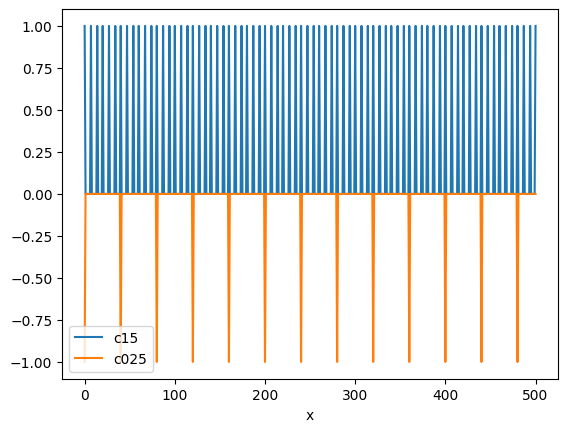

In [20]:
def should_tile_change(steps, nebula_tile_drift_speed):
    return (steps - 1) * abs(nebula_tile_drift_speed) % 1 > steps * abs(nebula_tile_drift_speed) % 1


x = np.linspace(0, 500, 501)


df = pd.DataFrame({
    'x': x,
    'c15': should_tile_change(x, 0.15).astype(int),
    # 'c20': -should_tile_change(x, 0.10).astype(int),
    # 'c05': should_tile_change(x, 0.05).astype(int),
    'c025': -should_tile_change(x, 0.025).astype(int),
})

df.set_index('x').plot()

In [21]:
len(should_tile_change(x, 0.025).astype(int))

501

In [23]:
np.argwhere(should_tile_change(x, 0.05).astype(int))

array([[  0],
       [ 20],
       [ 40],
       [ 60],
       [ 80],
       [100],
       [120],
       [140],
       [160],
       [180],
       [200],
       [220],
       [240],
       [260],
       [280],
       [300],
       [320],
       [340],
       [360],
       [380],
       [400],
       [420],
       [440],
       [460],
       [480],
       [500]])